# Symbolic Python

Symbolic logic uses _symbols_ and variables to express logical statements. Mathematics is a naturally symbolic languages (for example, an equation is an equality logic expression between left and right term). The computer does not think in terms of symbols but in terms of number and values, and since its memory is discrete and finite inevitably it truncates information (for example, $\pi$ has infinite digits, but the computer operates a truncation of the value of $\pi$).

Symbolic libraries in programming languages bridge this gap: they solve mathematical expression _exactly_ using the same mathematical symbols that are used manually.

More about SymPy: https://www.sympy.org/en/index.html and https://docs.sympy.org/latest/index.html (a very in-depth documentation with lots of examples).

In [ ]:
# Example: compute the square root of a number using computer and symbolic logic

import math
import numpy
import sympy

x = 7

mathroot = math.sqrt(x)
numpyroot = numpy.sqrt(x)
sympyroot = sympy.sqrt(x)

sympyroot

sqrt(7)

NumPy and Math modules approximates the value of the square root, whereas SymPy leaves it unevaluated. So, _numpy.sqrt_ and _math.sqrt_ are approximations, but _sympy_sqrt_ is the exact value and when we use it in an expression, we are using this exact (unevaluated) value. With SymPy, the approximation occurs only when we want to show the value.

## Represent NUMBERS in SymPy

SymPy defines its own native class for numbers, with the following types:
* INTEGER (discard the fractional part of the input)
* FLOAT (floating point number of arbitrary precision that must be specified, can also use scientific notation)
* RATIONAL (rational number with non-zero denominator. Unless specified, this gives the binary representation of the fraction, that is, the numerator and the denominator that best approximate the given number).

Perhaps most interestingly, SymPy also defines number objects that can be used in symbolic operations, such as:
* _sp.S.nan_ (Not-a-Number)
* _sp.S.infty_ or _sp.oo_ (infinity)
* _sp.S.ImaginaryUnit_ (exact square root of -1)
These are contained in the subclass _S_, the _singleton class_, for this reason we must call it explicitly.






In [ ]:
# Define the numbers 10, 6.32 and 1/6 using the three number classes in SymPy

import sympy as sp

y = sp.Integer(10)
y = sp.Integer(6.32)
y = sp.Integer(1/6)

y = sp.Float(10)
y = sp.Float(6.32,4)
y = sp.Float(1/6)

y = sp.Rational(1/6).limit_denominator()
y = sp.Rational(0.167).limit_denominator()

y = sp.Rational(2,12)
y = sp.Float(1E10)

print(y)

10000000000.0000


In [ ]:
# Use SymPy to define NaN, infinity and the imaginary unit

Notanumber = sp.S.NaN
Infinite = sp.S.Infinity
IU = sp.S.ImaginaryUnit

IU

I

In [ ]:
# Define a complex number and compute its conjugate

omega = 4 - 5*IU
omegareal = sp.re(omega)
omegaimag = sp.im(omega)
conju = sp.conjugate(omega)

conju

4 + 5*I

## Represent VARIABLES in SymPy

To define variables, we use the _Symbol_ class.
To define multiple variables at once, we can use the _symbols_ method.

In [ ]:
# Define two variables x and y, square them and then compute their sum

LambdaXe = sp.Symbol('l_x')

x = sp.Symbol('x', real = True, nonnegative = True)
y = sp.Symbol('y')

f = x**2 + y**2

f

x**2 + y**2

In [ ]:
# Use symbols to define variables for the six group of precursors in a smart way

n = sp.symbols('n(1:7)')

n

(n1, n2, n3, n4, n5, n6)

Some of the most useful mathematical operations that we can do with SymPy:
* SUBSTITUTION: substitute a value or a variable in an expression
* SYMPIFY: convert a Python expression in a SymPy one
* LAMBDIFY: convert a SymPy expression in a Python one
* EVALF: evaluate an expression
* SIMPLIFY: simplify (or try to) a SymPy expression (be careful that for complex expression, you should help the computer by giving hints).
* FACTORISE: factorise an expression

In [ ]:
# Define the string 'sin^2(x) + cos^2(x)' and then:
# - convert it into a SymPy expression
# - substitute x = 45° (defined as Python number)
# - substitute x = 45° (defined as sp.Float)
# - use 'evalf' wiht x = 45° (defined as sp.Float)
# - convert this expression in a numerical one (we want np.cos and np.sin)
# - Simplify this expression

import numpy as np

x = sp.Symbol('x')
a = sp.Float(45/180)*sp.pi
b = 45/180*np.pi

string = 'sin(x)**2 + cos(x)**2'
expr = sp.sympify(string)

subexpr = expr.subs(x,b)

exprsimple = sp.simplify(expr)

expr = x**2 + x

expr2numpy = sp.lambdify(x,expr,'numpy')

expr2numpy(b)

1.4022484384655332

We can use SymPy also to compute derivative and integrals.

In [ ]:
# Consider the expression 2 * sin(x^2)
# - Compute its first and second derivatives
# - Compute its indefinite integral
# - Compute its integral between o and pi

f = sp.sin(x**2)
df = sp.diff(f,x)
df2 = sp.diff(f,x,2)
integr = sp.integrate(2*x*sp.sin(x**2),x)
defintegr = sp.integrate(2*x*sp.sin(x**2),(x,0,np.pi))


SymPy also includes transformations (but be careful: always check analytically because the Transformation class in SymPy is still under development. Usually they work well for simple functions, have some troubles with complex ones (and if the transformed function doesn't have a standard anti-transform, SymPy returns an unevaluated expression).

In [ ]:
# Consider the expression exp(-x^2)
# - Compute its Fourier transform
# - Compute its Laplace transform
# - Compute its Taylor expansion
# - Compute the Legendre polynomials

k = sp.Symbol('k')
s = sp.Symbol('s')
x = sp.Symbol('x')

f = sp.exp(-x**2)

Four = sp.fourier_transform(f,x,k)
Lapl = sp.laplace_transform(f,x,s)

display(Four)
display(Lapl)

TaylorS = sp.series(f,x,n=12)

TaylorS

sqrt(pi)*exp(-pi**2*k**2)

(sqrt(pi)*exp(s**2/4)*erfc(s/2)/2, 0, True)

1 - x**2 + x**4/2 - x**6/6 + x**8/24 - x**10/120 + O(x**12)

SymPy has a special class for matrices (https://docs.sympy.org/latest/modules/matrices/matrices.html)

In [ ]:
# Define a 3 x 3 SymPy matrix
# - Extract the first row and the first column
# - Compute its determinant
# - Compute the eigenvalues and eigenvectors
# - Diagonalize the matrix

m = sp.Matrix(
    [
        [1,2,3], #first row
        [4,5,6],#second row
        [7,8,9], #third row
    ])

m.shape

m.row(0)
#help(sp.Matrix)

Matrix([[1, 2, 3]])

## Writing Equations in SymPy

Equations are written using the _sp.Eq_ function (Eq stands for equality: we need to specify the RHS and the LHS separate by a comma).

In [ ]:
# Write the equation x^2 - 9 = 0 and solve it

x = sp.Symbol('x')
y = sp.Symbol('y')

Equation = sp.Eq(x**2-9,0)

Solution = sp.solve(Equation,x)

Solution

[-3, 3]

In [ ]:
# Write the system of equations x-y = 4 ; x+y = 1 and solve it

System = [
    sp.Eq(x-y,4),
    sp.Eq(x+y,1)
]

Solution = sp.linsolve(System,(x,y))

Solution

{(5/2, -3/2)}

In [ ]:
# Write the system of equations x^2 + x = 0 ; x - y = 0 and solve it

System = [
    sp.Eq(x**2+x,0),
    sp.Eq(x-y,0)
]

Solution = sp.nonlinsolve(System, (x,y))

Solution

#help(sp.nonlinsolve)

{(-1, -1), (0, 0)}

To write a differential equation, we need to specify the _Function_ that we are going to differentiate using either _sp.Function_ or _sp.symbols_ with the argument _cls = sp.Function_. Remember that when we write functions we must also specify the independent variable (just like sin(x), sin is the function, x the variable, but instead of 'sin' I have an unknown function 'f')

In [ ]:
# Write the differential equation df - f = sin(x) (ODE)

f = sp.symbols('f', cls = sp.Function)

Equation = sp.Eq(f(x).diff(x)-f(x),sp.sin(x))

Solution = sp.dsolve(Equation)

Solution

Eq(f(x), C1*exp(x) - sin(x)/2 - cos(x)/2)

In [ ]:
# Write the differential equation 1 + 2*df/dx + 3*df/dy = 0 (PDE)

Equation = sp.Eq(1+2*f(x,y).diff(x)+3*f(x,y).diff(y),0)

Solution = sp.pdsolve(Equation)

Solution

Eq(f(x, y), -2*x/13 - 3*y/13 + F(3*x - 2*y))

In [ ]:
help(sp.solvers.dsolve)

Help on function dsolve in module sympy.solvers.ode.ode:

dsolve(eq, func=None, hint='default', simplify=True, ics=None, xi=None, eta=None, x0=0, n=6, **kwargs)
    Solves any (supported) kind of ordinary differential equation and
    system of ordinary differential equations.
    
    For single ordinary differential equation
    
    It is classified under this when number of equation in ``eq`` is one.
    **Usage**
    
        ``dsolve(eq, f(x), hint)`` -> Solve ordinary differential equation
        ``eq`` for function ``f(x)``, using method ``hint``.
    
    **Details**
    
        ``eq`` can be any supported ordinary differential equation (see the
            :py:mod:`~sympy.solvers.ode` docstring for supported methods).
            This can either be an :py:class:`~sympy.core.relational.Equality`,
            or an expression, which is assumed to be equal to ``0``.
    
        ``f(x)`` is a function of one variable whose derivatives in that
            variable make up the o

In [ ]:
r = sp.Symbol('r')
L = sp.Symbol('L')
S = sp.Symbol('S')
D = sp.Symbol('D')
SA = sp.Symbol('Sigma_a')

phi = sp.Function('phi')
K0 = sp.besselk(0,r/L)

Flux = sp.Eq(phi(r),S/(2*sp.pi*D)*K0)
IntegralFunction = r*SA*Flux.rhs*2*sp.pi*r

Integral = sp.integrate(IntegralFunction/S,(r,0,sp.oo))

Integral.subs(L**3,D*L/SA)



Piecewise((pi*L/2, Abs(arg(L)) < pi/2), (Integral(Sigma_a*r**2*besselk(0, r/L)/D, (r, 0, oo)), True))

In [ ]:
IntegralFunction = r**2*SA*Flux.rhs*2*sp.pi*r

Integral = sp.integrate(IntegralFunction/S,(r,0,sp.oo))

Integral.subs(L**4,D*L**2/SA)

Piecewise((4*L**2, Abs(arg(L)) < pi/2), (Integral(Sigma_a*r**3*besselk(0, r/L)/D, (r, 0, oo)), True))

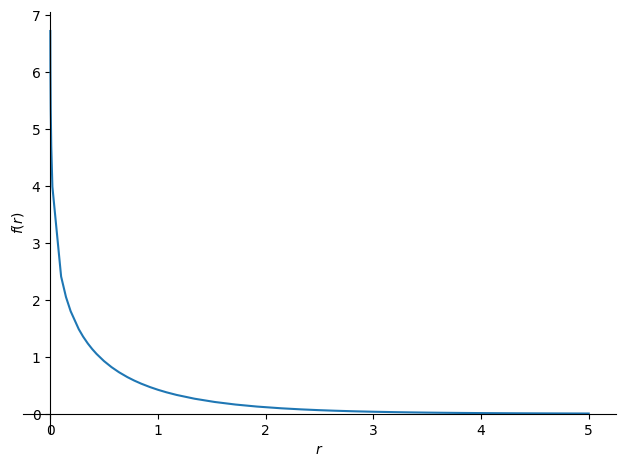

In [ ]:
from sympy.plotting import plot

sp.plot(sp.besselk(0,r),(r,-5,5))
